In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as rsq
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import pickle 

In [2]:
data=pd.read_csv('Algerian_forest_clean.csv')

In [3]:
data.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI   Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire       1
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire       1
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire       1
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire       1
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire       1

In [4]:
data['Classes']=np.where(data['Classes']=="not fire",0,1)

In [5]:
#splittin the data
x=data.drop('FWI',axis=1)
y=data['FWI']

In [6]:
#splitting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [7]:
x_train

Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI  Classes  Region
226           28  81  15   0.0  84.6  12.6   41.5   4.3  14.3        1       2
65            34  65  13   0.0  86.8  11.1   29.7   5.2  11.5        1       1
168           33  68  15   0.0  86.1  23.9   51.6   5.2  23.9        1       2
206           34  40  18   0.0  92.1  56.3  157.5  14.3  59.5        1       2
144           33  59  16   0.8  74.2   7.0    8.3   1.6   6.7        0       2
..           ...  ..  ..   ...   ...   ...    ...   ...   ...      ...     ...
106           24  82  15   0.4  44.9   0.9    7.3   0.2   1.4        0       1
14            28  80  17   3.1  49.4   3.0    7.4   0.4   3.0        0       1
92            25  76  17   7.2  46.0   1.3    7.5   0.2   1.8        0       1
179           34  59  16   0.0  88.1  19.5   47.2   7.4  19.5        1       2
102           30  77  21   1.8  58.5   1.9    8.4   1.1   2.4        0       1

[162 rows x 11 columns]

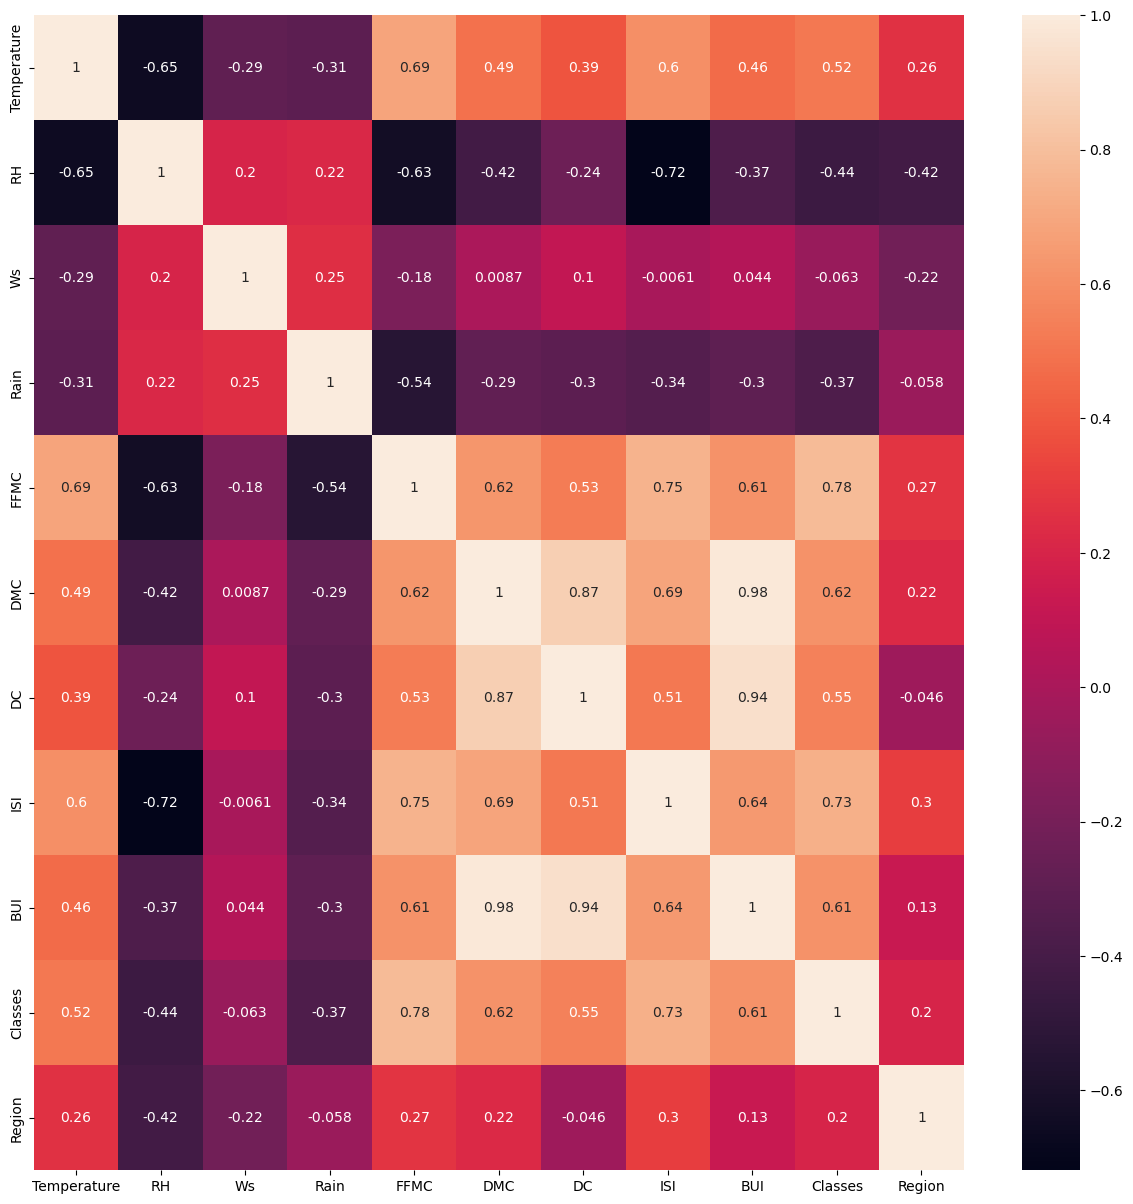

In [8]:
# multicorrelation
plt.figure(figsize=(15,15))
sb.heatmap(x_train.corr(),annot=True)
plt.show()

In [9]:
relation=x_train.corr()

In [10]:
relation

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.653217 -0.294493 -0.306845  0.686784  0.485957   
RH             -0.653217  1.000000  0.200772  0.218350 -0.633803 -0.416955   
Ws             -0.294493  0.200772  1.000000  0.247112 -0.178626  0.008702   
Rain           -0.306845  0.218350  0.247112  1.000000 -0.537842 -0.288821   
FFMC            0.686784 -0.633803 -0.178626 -0.537842  1.000000  0.624492   
DMC             0.485957 -0.416955  0.008702 -0.288821  0.624492  1.000000   
DC              0.387369 -0.240523  0.101059 -0.304050  0.528396  0.869090   
ISI             0.600649 -0.718725 -0.006136 -0.340753  0.748319  0.685568   
BUI             0.463775 -0.365222  0.043700 -0.300830  0.611220  0.983366   
Classes         0.515616 -0.444497 -0.062682 -0.366668  0.782922  0.617266   
Region          0.260966 -0.419498 -0.216375 -0.057620  0.271324  0.222615   

                   DC       ISI       BUI   Classes    Region  
Temperature  0.387369  0.600649  0.463775  0.515616  0.260966  
RH          -0.240523 -0.718725 -0.365222 -0.444497 -0.419498  
Ws           0.101059 -0.006136  0.043700 -0.062682 -0.216375  
Rain        -0.304050 -0.340753 -0.300830 -0.366668 -0.057620  
FFMC         0.528396  0.748319  0.611220  0.782922  0.271324  
DMC          0.869090  0.685568  0.983366  0.617266  0.222615  
DC           1.000000  0.514349  0.942305  0.547390 -0.046399  
ISI          0.514349  1.000000  0.643968  0.733342  0.304554  
BUI          0.942305  0.643968  1.000000  0.613711  0.127509  
Classes      0.547390  0.733342  0.613711  1.000000  0.197291  
Region      -0.046399  0.304554  0.127509  0.197291  1.000000

In [11]:
def multicoll_column(relation,threshold):
    mul_c=set()
    correl=relation.corr()
    for i in range(len(correl.columns)):
        # print('THIS IS I: ',i)
        for j in range(i):
            # print('this is j: ',j)
            if(abs(correl.iloc[i,j])>threshold):
                cl=correl.columns[i]
                mul_c.add(cl)
    return mul_c

In [12]:
d_col=multicoll_column(x_train,0.85)
d_col

{'BUI', 'DC'}

In [13]:
x_train.drop(d_col,axis=1)
x_test.drop(d_col,axis=1)
x_train.shape

(162, 11)

In [14]:
#standarization
st=StandardScaler()
scaler_xtrain=st.fit_transform(x_train)
scaler_xtest=st.fit_transform(x_test)

In [15]:
scaler_xtrain

array([[-1.12656349,  1.2199876 , -0.22762867, ..., -0.20093835,
         0.90566259,  0.9877296 ],
       [ 0.52256258,  0.1473255 , -0.98795537, ..., -0.38763567,
         0.90566259, -1.01242284],
       [ 0.24770824,  0.34844965, -0.22762867, ...,  0.43916677,
         0.90566259,  0.9877296 ],
       ...,
       [-1.95112653,  0.88478069,  0.53269803, ..., -1.03440854,
        -1.10416397, -1.01242284],
       [ 0.52256258, -0.25492278,  0.15253468, ...,  0.14578526,
         0.90566259,  0.9877296 ],
       [-0.5768548 ,  0.95182207,  2.05335143, ..., -0.99440197,
        -1.10416397, -1.01242284]])

In [16]:
'''enc=OrdinalEncoder()

ar_code=enc.fit_transform(updated_data['Classes'].values.reshape(-1,1))
ar_code.flatten()
res=list(map(int,np.concatenate(ar_code)))
'''

"enc=OrdinalEncoder()\n\nar_code=enc.fit_transform(updated_data['Classes'].values.reshape(-1,1))\nar_code.flatten()\nres=list(map(int,np.concatenate(ar_code)))\n"

In [17]:
#linear regression model
linear=LinearRegression()
linear.fit(scaler_xtrain,y_train)
y_pred=linear.predict(scaler_xtest)
error=mae(y_test,y_pred)
r2=rsq(y_test,y_pred)
print(error)
print(r2)

1.1332524365753736
0.9535651457104818


In [18]:
#lasso regression model
l=Lasso()
l.fit(scaler_xtrain,y_train)
y_pre=l.predict(scaler_xtest)
error=mae(y_test,y_pre)
r2=rsq(y_test,y_pre)
print(error)
print(r2)

0.9092470566324545
0.9728751156661042


In [19]:
#ridge regression model
r=Ridge()
r.fit(scaler_xtrain,y_train)
y_pre=r.predict(scaler_xtest)
error=mae(y_test,y_pre)
r2=rsq(y_test,y_pre)
print(error)
print(r2)

1.1243376775293583
0.9539328523564417


In [20]:
#elastic regression
e=ElasticNet()
e.fit(scaler_xtrain,y_train)
y_pre=e.predict(scaler_xtest)
error=mae(y_test,y_pre)
r2=rsq(y_test,y_pre)
print(error)
print(r2)

1.4424296931130927
0.9277734394155606


In [22]:
pickle.dump(l, open ('lasso.pkl','wb') )
pickle.dump(st, open('scaler.pkl','wb'))